In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import zipfile

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('gdrive/MyDrive/Exitdf.csv')
df.head()

,Unnamed: 0,PersonalStatement,Exit
0,0,I believe I am an ideal candidate for this cou...,Non-Exit
1,1,I have been fascinated with forensic science f...,Non-Exit
2,2,I would like to study Electronic Engineering a...,Non-Exit
3,3,Gaining expert knowledge of both law and Busin...,Non-Exit
4,4,"My passion for History began at a young age, w...",Non-Exit


In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
#dum= pd.get_dummies(df['Exit'])

In [ ]:
#df = df.rename(columns={'Name': 'EmpName'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


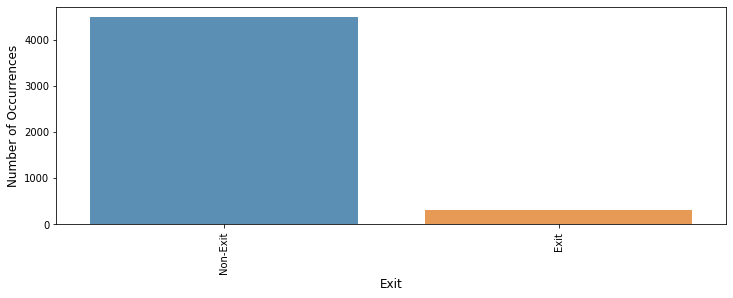

In [ ]:
cnt_pro = df['Exit'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Exit', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [ ]:
df['Exit'] = df['Exit'].replace(['Exit'],1)


In [ ]:
df['Exit'] = df['Exit'].replace(['Non-Exit'],0)


In [ ]:
X = df['PersonalStatement']
y = df['Exit']

X_train_sentences, X_test_sentences, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

# **Tokenizing the words:**

Cause our data is text data, it has to be converted into numerical form since that’s what the deep learning model expects. To convert sentences into numerical representations we use Tokenizer, which removes punctuation marks and special characters and converts the sentence to lowercase letter.

In [ ]:
vocab_size = 2000
embedding_dim = 16
max_len = 100
trunction_type='post'
padding_type='post'
oov_token = "<OOV>"

In [ ]:
tokenize = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenize.fit_on_texts(X_train_sentences)

The word index show us how words are mapped into numbers:

In [ ]:
word_index = tokenize.word_index


By use texts_to_sequences from the tokenizer we convert the words into sequences so that a complete sequence of numbers can represent every sentence.



In [ ]:
X_train = tokenize.texts_to_sequences(X_train_sentences)
X_test = tokenize.texts_to_sequences(X_test_sentences)

In [ ]:
X_train[9:11]


[[3,
  121,
  4,
  341,
  14,
  918,
  2,
  920,
  170,
  35,
  8,
  201,
  45,
  10,
  3,
  23,
  189,
  175,
  8,
  1,
  5,
  1,
  7,
  5,
  467,
  2,
  113,
  920,
  505,
  31,
  4,
  1073,
  5,
  1,
  29,
  3,
  97,
  107,
  81,
  175,
  2,
  433,
  8,
  166,
  43,
  4,
  91,
  47,
  920,
  1,
  2,
  399,
  1803,
  1,
  1,
  3,
  11,
  46,
  537,
  4,
  68,
  5,
  299,
  2,
  303,
  1,
  10,
  9,
  685,
  148,
  30,
  1,
  8,
  6,
  727,
  467,
  103,
  1,
  8,
  12,
  6,
  163,
  14,
  1,
  16,
  16,
  3,
  11,
  1510,
  34,
  1,
  4,
  1588,
  1,
  49,
  3,
  28,
  1487,
  92,
  591,
  2,
  8,
  9,
  468,
  69,
  3,
  87,
  46,
  177,
  19,
  299,
  2,
  1106,
  8,
  5,
  946,
  1358,
  7,
  65,
  191,
  210,
  3,
  551,
  5,
  1111,
  811,
  93,
  3,
  87,
  293,
  4,
  1,
  9,
  51,
  15,
  155,
  616,
  4,
  846,
  1,
  2,
  920,
  8,
  448,
  109,
  7,
  9,
  611,
  27,
  15,
  1,
  19,
  47,
  601,
  8,
  9,
  845,
  3,
  1075,
  3,
  28,
  204,
  299,
  1,
  1,
  277,
  177

Now we add padding to our data by using pad_sequencesfunction to make it uniform.



In [ ]:

X_train_pad = pad_sequences(X_train,maxlen=max_len, padding=padding_type, 
                            truncating=trunction_type)

X_test_pad = pad_sequences(X_test,maxlen=max_len, padding=padding_type, 
                           truncating=trunction_type)


#**GloVe Embeddings**

In [ ]:
#We use pre-trained word embeddings to create own embedding layer. We loading the Glove embeddings and append them to a dictionary.
#Next we use this dictionary to create an embedding matrix for each word in the training set.


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip


--2022-08-29 08:00:21--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-08-29 08:00:21--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-08-29 08:00:22--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
!ls
!pwd

gdrive		   glove.6B.200d.txt  glove.6B.50d.txt	sample_data
glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip
/content


In [ ]:
embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    try:
       coefs = np.asarray(values[1:], dtype='float32')
       embeddings_index[word] = coefs
    except ValueError:
       pass
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
num_words = len(word_index) + 1

embedding_matrix = np.zeros((num_words, max_len))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word) 
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
#we create embedding layer
embedding_layer = Embedding(num_words,
                            max_len,
                            weights=[embedding_matrix],
                            input_length=max_len,
                            trainable=False)

#**Build the model**
We create a model using embedding layer and Bidirectional LSTM layers. Bidirectional LSTMs are supported in Keras via the Bidirectional layer wrapper and it takes a recurrent layer (e.g. the first LSTM layer) as an argument.

In [ ]:
model = Sequential([
    embedding_layer,
    Bidirectional(LSTM(embedding_dim, return_sequences=True)), 
    Bidirectional(LSTM(embedding_dim)),
    Dense(6, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          3148700   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 32)          14976     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               6272      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 198       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 3,170,153
Trainable params: 21,453
Non-tra

In [ ]:
#training 10 epochs
history = model.fit(X_train_pad, y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(X_test_pad, y_test),
                    verbose=1)

Epoch 1/10
120/120 [==============================] - 20s 111ms/step - loss: 0.3277 - accuracy: 0.9023 - val_loss: 0.2251 - val_accuracy: 0.9407
Epoch 2/10
120/120 [==============================] - 11s 94ms/step - loss: 0.2479 - accuracy: 0.9326 - val_loss: 0.2249 - val_accuracy: 0.9407
Epoch 3/10
120/120 [==============================] - 11s 93ms/step - loss: 0.2484 - accuracy: 0.9326 - val_loss: 0.2257 - val_accuracy: 0.9407
Epoch 4/10
120/120 [==============================] - 11s 92ms/step - loss: 0.2475 - accuracy: 0.9326 - val_loss: 0.2244 - val_accuracy: 0.9407
Epoch 5/10
120/120 [==============================] - 11s 92ms/step - loss: 0.2465 - accuracy: 0.9326 - val_loss: 0.2240 - val_accuracy: 0.9407
Epoch 6/10
120/120 [==============================] - 11s 93ms/step - loss: 0.2466 - accuracy: 0.9326 - val_loss: 0.2259 - val_accuracy: 0.9407
Epoch 7/10
120/120 [==============================] - 11s 93ms/step - loss: 0.2458 - accuracy: 0.9326 - val_loss: 0.2246 - val_accuracy

In [ ]:
#Predictions on a test set:

loss, accuracy = model.evaluate(X_test_pad,y_test)
print('Test accuracy :', accuracy)

31/31 [==============================] - 1s 29ms/step - loss: 0.2184 - accuracy: 0.9407
Test accuracy : 0.9406867623329163


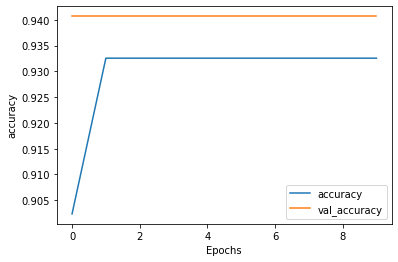

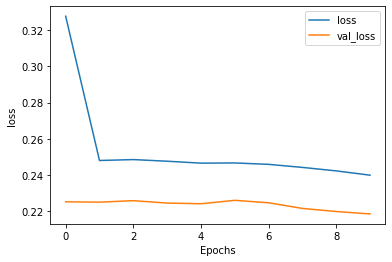

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
model.save("sentiment_model.h5")


#**Model 2**

We also test a second model with a Dropout layer for decrease overfitting and we increase number of epochs to 20.

In [ ]:
model2 = Sequential([
    embedding_layer,
    Bidirectional(LSTM(64, return_sequences=True)), 
    Bidirectional(LSTM(32)),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(lr=1e-4)
model2.compile(loss='binary_crossentropy', 
               optimizer=optimizer,
               metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          3148700   
                                                                 
 bidirectional_2 (Bidirectio  (None, 100, 128)         84480     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
callbacks = EarlyStopping(monitor = 'val_accuracy', 
                          mode = 'max', 
                          patience = 10,
                          verbose = 1)

In [ ]:
history2 = model2.fit(X_train_pad, y_train,
                    batch_size=32,
                    epochs=20,
                    validation_data=(X_test_pad, y_test),
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/20
120/120 [==============================] - 29s 186ms/step - loss: 0.3174 - accuracy: 0.9281 - val_loss: 0.2256 - val_accuracy: 0.9407
Epoch 2/20
120/120 [==============================] - 20s 171ms/step - loss: 0.2878 - accuracy: 0.9326 - val_loss: 0.2251 - val_accuracy: 0.9407
Epoch 3/20
120/120 [==============================] - 21s 172ms/step - loss: 0.2889 - accuracy: 0.9318 - val_loss: 0.2281 - val_accuracy: 0.9407
Epoch 4/20
120/120 [==============================] - 21s 172ms/step - loss: 0.2899 - accuracy: 0.9326 - val_loss: 0.2314 - val_accuracy: 0.9407
Epoch 5/20
120/120 [==============================] - 21s 172ms/step - loss: 0.2836 - accuracy: 0.9326 - val_loss: 0.2256 - val_accuracy: 0.9407
Epoch 6/20
120/120 [==============================] - 23s 190ms/step - loss: 0.2895 - accuracy: 0.9326 - val_loss: 0.2254 - val_accuracy: 0.9407
Epoch 7/20
120/120 [==============================] - 21s 172ms/step - loss: 0.2816 - accuracy: 0.9326 - val_loss: 0.2245 - val_ac

In [ ]:
loss, accuracy = model2.evaluate(X_test_pad,y_test)
print('Test accuracy :', accuracy)

31/31 [==============================] - 2s 49ms/step - loss: 0.2236 - accuracy: 0.9407
Test accuracy : 0.9406867623329163


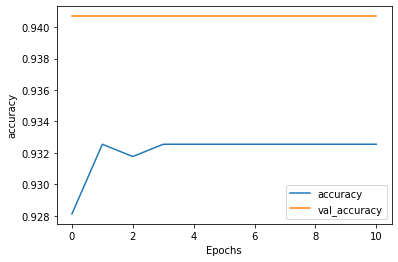

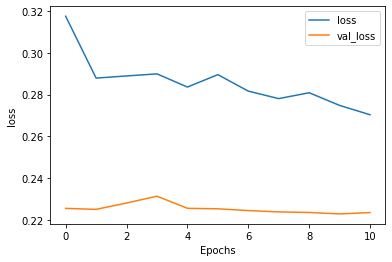

In [ ]:
plot_graphs(history2, "accuracy")
plot_graphs(history2, "loss")

Summary
In this attempt we used a pre-trained Glove word embeddings with Bidirectional LSTM Neural Network to resolve our classification problem. After trained two models we achieved an accuracy on the test set 94 % 